# Manan Shah
# Sidharth Thazhathedathu

In [1]:
# importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')


In [8]:
# importing Shale_Gas dataframe and converting the year format

In [4]:
data = pd.read_csv("Shale_Gas.csv")
data.head()
print(data.dtypes)

data['FirstProdDate'] = pd.to_datetime(data['FirstProdDate'],format='%Y').dt.year
data.describe()



Operator                           object
TD                                  int64
TVD                                 int64
TotalFluid                        float64
TotalProppant                     float64
TopPerf                             int64
BottomPerf                          int64
FluidType                          object
LateralLength                     float64
ChokeTopDescription               float64
MaxFlowingPSI                       int64
MaxShutinPSI                      float64
FlowGas                             int64
FlowWater                         float64
SurfaceX                          float64
SurfaceY                          float64
Z_BelowSurface                      int64
Isopach                             int64
Porosity                          float64
TotalGasBCFPerSection             float64
Temperature                       float64
Pressure                          float64
KOP                               float64
FirstProdDate                     

,TD,TVD,TotalFluid,TotalProppant,TopPerf,BottomPerf,LateralLength,ChokeTopDescription,MaxFlowingPSI,MaxShutinPSI,...,Porosity,TotalGasBCFPerSection,Temperature,Pressure,KOP,FirstProdDate,minLateralSpacing,numOfOffsetLateralSpacingWells,EUR,IP
count,185.000000,185.000000,180.000000,1.820000e+02,185.000000,185.000000,184.000000,185.000000,185.000000,177.000000,...,185.000000,185.000000,185.000000,185.000000,182.000000,185.000000,159.000000,185.000000,1.850000e+02,185.000000
mean,17255.367568,10373.994595,238768.429611,1.065082e+07,10683.897297,16982.264865,4829.658872,4.320861,4622.167568,5575.000000,...,0.101601,127.452912,277.732649,7893.087711,4146.403956,2016.275676,1240.211989,1.340541,1.034649e+07,8559.237912
std,1594.211971,886.740523,132147.315357,5.207726e+06,988.571848,1589.276462,1184.334717,38.159769,1231.230027,1106.543621,...,0.018331,52.630402,17.641534,904.298402,1448.469604,1.163159,347.414411,0.713023,4.174170e+06,3316.253229
min,13596.000000,8604.000000,57243.860000,7.150000e+05,8720.000000,12510.000000,1122.750000,0.187500,15.000000,2400.000000,...,0.048800,54.685100,243.540000,6233.334750,595.500000,2014.000000,445.397387,0.000000,1.800000e+06,3353.632184
25%,15953.000000,9757.000000,147320.900000,5.932182e+06,10112.000000,15661.000000,3831.750000,0.250000,4095.000000,4792.000000,...,0.095500,75.182000,264.000000,7200.000000,4259.500000,2015.000000,982.736044,1.000000,7.400000e+06,5646.551724
50%,17155.000000,10168.000000,183113.200000,1.023100e+07,10486.000000,16907.000000,4831.125000,0.343750,4575.000000,5435.000000,...,0.106000,124.120600,272.620000,7621.508205,4641.750000,2016.000000,1261.086161,1.000000,9.800000e+06,8302.561248
75%,18206.000000,10767.000000,305605.300000,1.404600e+07,11016.000000,17853.000000,5739.937500,0.375000,5056.000000,6248.000000,...,0.116800,180.412000,285.320000,8257.908091,5042.375000,2017.000000,1355.496604,2.000000,1.310000e+07,10878.493270
max,21594.000000,13000.000000,711477.100000,2.661400e+07,17603.000000,21075.000000,8415.000000,368.593750,8204.000000,9350.000000,...,0.120600,190.662400,328.420000,10554.305480,6215.500000,2018.000000,2745.700244,2.000000,2.400000e+07,19330.525120


### 1. Checking for Missing Values and Imputing using KNN

In [5]:
data.isna().sum()

Operator                           0
TD                                 0
TVD                                0
TotalFluid                         5
TotalProppant                      3
TopPerf                            0
BottomPerf                         0
FluidType                          5
LateralLength                      1
ChokeTopDescription                0
MaxFlowingPSI                      0
MaxShutinPSI                       8
FlowGas                            0
FlowWater                          2
SurfaceX                           0
SurfaceY                           0
Z_BelowSurface                     0
Isopach                            0
Porosity                           0
TotalGasBCFPerSection              0
Temperature                        0
Pressure                           0
KOP                                3
FirstProdDate                      0
minLateralSpacing                 26
numOfOffsetLateralSpacingWells     0
EUR                                0
I

In [3]:
#replacing it with np.nan

In [6]:
data.replace([np.inf, -np.inf, -999, '', 'inf', 'NaaN', 'NaN', None,' df ', 'XXX'], np.nan, inplace=True)

In [4]:
# Encoding Missing values and Imputing missing values

In [7]:
from sklearn.preprocessing import LabelEncoder


le1 = LabelEncoder()
data['Operator'] = le1.fit_transform(data['Operator'].astype(str))

le2 = LabelEncoder()
data['FluidType'] = le2.fit_transform(data['FluidType'].astype(str))

imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data)


In [5]:
#Saving the two encodes and the Missind value for deployment 

In [8]:
import pickle 

filename = 'ShaleGas_encoder1.sav'

pickle.dump(le1,open(filename,'wb'))

In [9]:
import pickle 

filename = 'ShaleGas_encoder2.sav'

pickle.dump(le2,open(filename,'wb'))

In [10]:
filename = 'ShaleGas_imp.sav'

pickle.dump(imputer,open(filename,'wb'))

In [11]:
data_imputed = pd.DataFrame(data_imputed)
data_imputed.columns = data.columns

In [12]:
data_imputed['Operator'] = data_imputed['Operator'].astype(int)
data_imputed['FluidType']= data_imputed['FluidType'].astype(int)

### 2. Address outliers, remove collinear features, and create new features

We will first concentrate on finding outliers and removing the collinear features. We will add scaling as a pipeline when we run the model. These are the steps which we will now follow:

Step 1: Identify and Remove Outliers

Step 2: Remove Collinear Features

Step 3: Identify new Features to add

In [13]:
from sklearn.ensemble import IsolationForest
model =  IsolationForest(contamination = 0.05)
model.fit(data_imputed)
anomaly25 = pd.Series(model.predict(data_imputed)) #Adds an extra column which shows whether a point is in-lier or outlier

#Removing Outliers
data_imputed = data_imputed[anomaly25==1] #Keep only the data where inliner = 1

In [14]:
filename = 'ShaleGas_outlier.sav'

pickle.dump(model,open(filename,'wb'))

In [15]:
X1 = data_imputed.iloc[:,0:26] 
y1 = data_imputed.iloc[:,26:28]

In [16]:
from sklearn.model_selection import train_test_split

#This is the train test split using regular 
X_tr, X_ts, y_tr, y_ts = train_test_split(X1, y1, test_size=0.2)


Removing collinear features

In [17]:
# Calculate VIF for all features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_tr.values, i) for i in range(X_tr.shape[1])]
vif["features"] = X_tr.columns

In [18]:
vif[vif["VIF Factor"] > 10]

,VIF Factor,features
1,2.119447e+02,TD
2,2.498500e+01,TVD
5,2.405103e+01,TopPerf
6,1.126269e+01,BottomPerf
8,1.848185e+02,LateralLength
14,3.448198e+02,SurfaceX
15,6.796027e+01,SurfaceY
16,5.362851e+07,Z_BelowSurface
17,2.332241e+01,Isopach
18,1.272679e+01,Porosity


In [19]:
# Identify features with VIF greater than 5
vif_features = list(vif[vif["VIF Factor"] > 10]["features"])
print("Features with VIF greater than 10:")
print(vif_features)

Features with VIF greater than 10:
['TD', 'TVD', 'TopPerf', 'BottomPerf', 'LateralLength', 'SurfaceX', 'SurfaceY', 'Z_BelowSurface', 'Isopach', 'Porosity', 'TotalGasBCFPerSection', 'Temperature', 'Pressure']


Based on the description of above features, I am a little bit hesitant on removing them yet, since we may need them to extract new features or apply some sort of feature transformation. So instead, we will try using PCA since interpretability is not of primary concern for us.

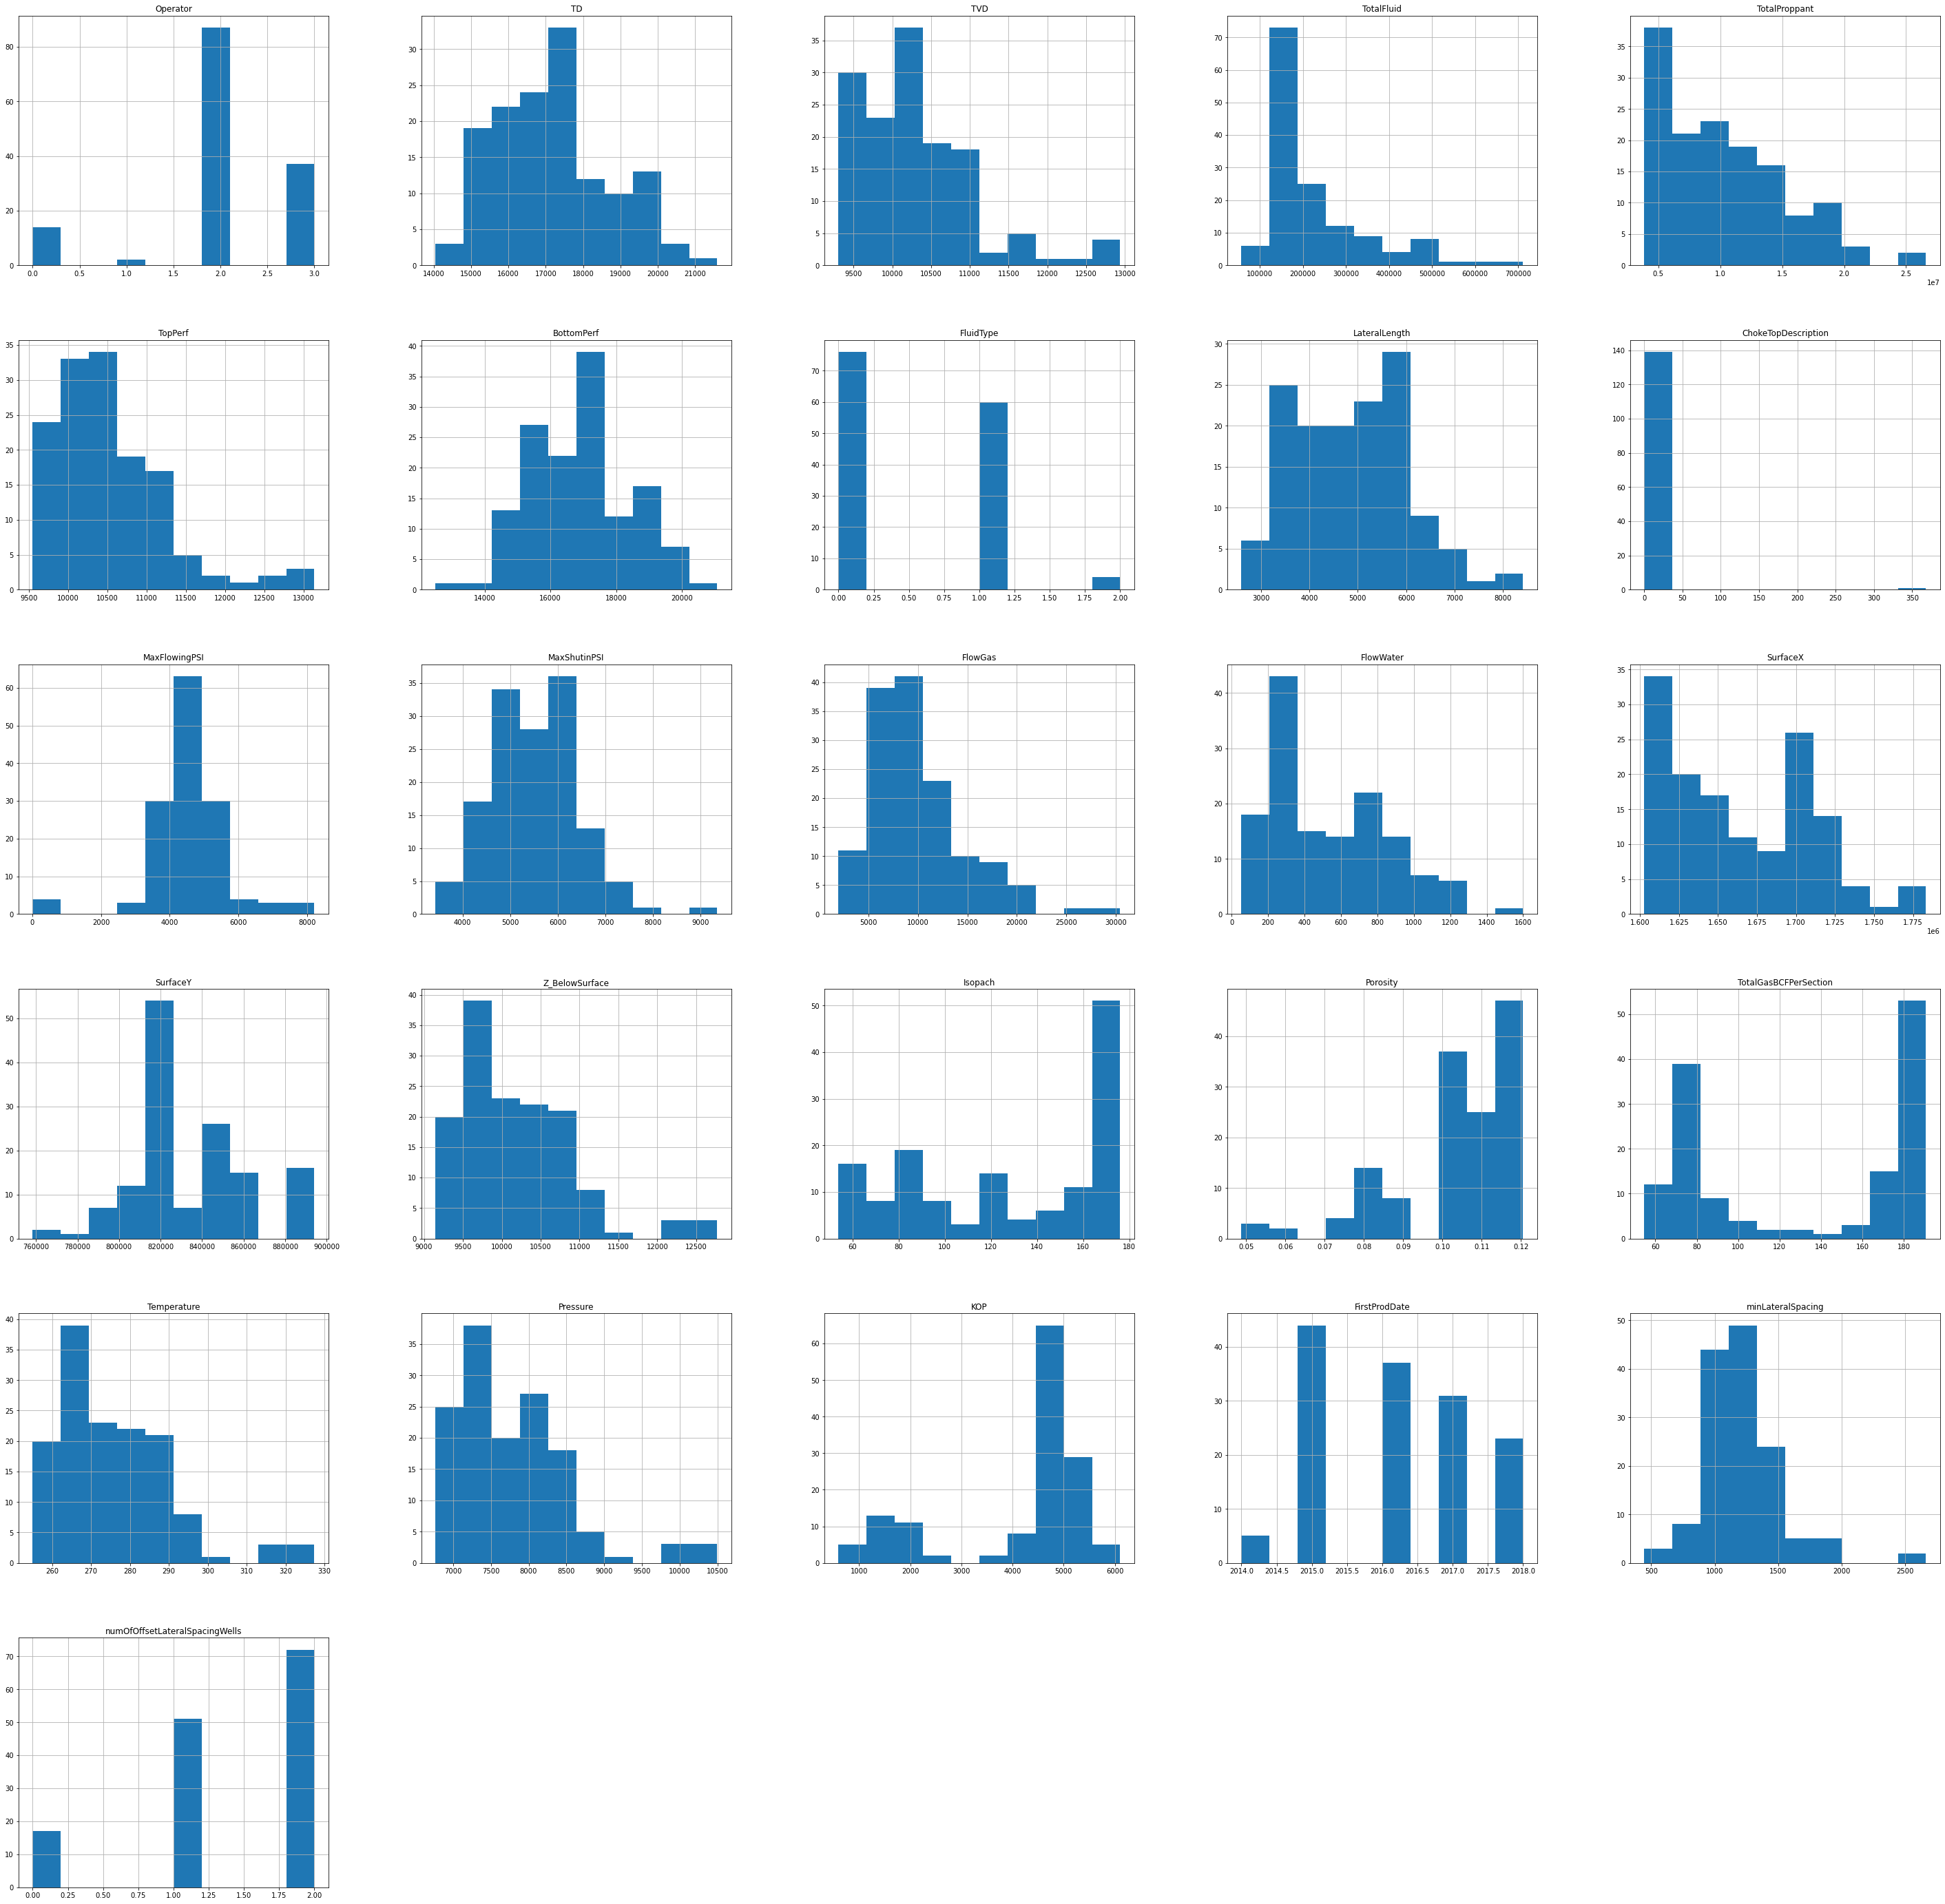

In [20]:
X_tr.hist(figsize=(50, 50))
plt.show()

Based on the distribution of above plots(Skewness), we will take certain transformation to create new features. 

In [21]:
X_tr['TotalProppant'] = np.log(X_tr['TotalProppant'])
X_tr['TotalFluid'] = np.log(X_tr['TotalFluid'])
X_tr['TotalProppant'] = np.log(X_tr['TotalProppant'])
X_tr['TotalFluid'] = np.log(X_tr['TotalFluid'])

In [22]:
X_ts['TotalProppant'] = np.log(X_ts['TotalProppant'])
X_ts['TotalFluid'] = np.log(X_ts['TotalFluid'])
X_ts['TotalProppant'] = np.log(X_ts['TotalProppant'])
X_ts['TotalFluid'] = np.log(X_ts['TotalFluid'])

Adding New Features

In [23]:
X_tr['Fracture Length'] = X_tr['BottomPerf'] - X_tr['TopPerf']
X_tr['Net Pay'] = X_tr['Isopach'] * X_tr['Porosity']
X_tr['Initial Permeability'] = 0.001 * X_tr['FlowGas']/(X_tr['Pressure']*X_tr['LateralLength']*0.5*(X_tr['SurfaceX']+X_tr['SurfaceY']))


In [24]:
X_ts['Fracture Length'] = X_ts['BottomPerf'] - X_ts['TopPerf']
X_ts['Net Pay'] = X_ts['Isopach'] * X_ts['Porosity']
X_ts['Initial Permeability'] = 0.001 * X_ts['FlowGas']/(X_ts['Pressure']*X_ts['LateralLength']*0.5*(X_ts['SurfaceX']+X_ts['SurfaceY']))


In [25]:
Operator=X_tr['Operator']

### 3. Feature Importance using Random Forest v/s Gradient Boosting

In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state=42)
param_grid1 = {'n_estimators': [30, 50, 100],'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

#Call the function
grid1 = GridSearchCV(rfr, param_grid=param_grid1, cv=5, verbose=2, n_jobs = -1)

#fit the function
grid1.fit(X_tr, y_tr.iloc[:,1])



Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50, 100]},
             verbose=2)

In [27]:

gb = GradientBoostingRegressor(n_estimators=500, max_depth=5, random_state=42)
param_grid_gb = {'n_estimators': [30, 50, 100],'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10], 'alpha': [0.2,0.4,0.6,0.8], 'learning_rate':[0.01,0.1,1.0]}

#Call the function
grid_gb = GridSearchCV(gb, param_grid=param_grid_gb, cv=5, verbose=2)
grid_gb.fit(X_tr, y_tr.iloc[:,1])


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=30; total time=   0.0s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END alpha=0.2, learning_rate=0.01, max_depth=5, min

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=5, n_estimators=500,
                                                 random_state=42),
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [30, 50, 100]},
             verbose=2)

In [28]:
# Calculate the feature importance for each model
rfr1_importance = pd.Series(grid1.best_estimator_.feature_importances_, index=X_tr.columns)
gb_importance = pd.Series(grid_gb.best_estimator_.feature_importances_, index=X_tr.columns)


# Combine the feature importance into a dataframe
importance_df = pd.DataFrame(rfr1_importance)

importance_df['Gradient Boosting'] = gb_importance


In [29]:
importance_df.rename(columns={0:'Random Forest'},inplace=True)

In [ ]:
importance_df

In [6]:
#ranked according to RandomForest

In [30]:
rf_feature_importance = grid1.best_estimator_.feature_importances_
rf_ranked_indices = np.argsort(rf_feature_importance)[::-1]
rf_ranked_features = [X_tr.columns[i] for i in rf_ranked_indices]
print("Feature Importance (Random Forest):")
count=1

feature_imp_rf=pd.DataFrame()
feature_imp_rf['rf_ranked_features']=rf_ranked_features
feature_imp_rf.index = np.arange(1, len(feature_imp_rf) + 1)

feature_imp_rf

Feature Importance (Random Forest):


,rf_ranked_features
1,FlowGas
2,Fracture Length
3,LateralLength
4,TotalProppant
5,Net Pay
6,MaxFlowingPSI
7,minLateralSpacing
8,BottomPerf
9,SurfaceY
10,TotalFluid


In [7]:
#ranked according to gradient boosting

In [31]:

gb_importance = grid_gb.best_estimator_.feature_importances_
gb_ranked_indices = np.argsort(gb_importance)[::-1]
gb_ranked_features = [X_tr.columns[i] for i in gb_ranked_indices]
print("Feature Importance (Gradient Boosting Forest):")


feature_imp_gb=pd.DataFrame()
feature_imp_gb['gb_ranked_features']=gb_ranked_features
feature_imp_gb.index = np.arange(1, len(feature_imp_gb) + 1)

feature_imp_gb

Feature Importance (Gradient Boosting Forest):


,gb_ranked_features
1,FlowGas
2,Fracture Length
3,LateralLength
4,SurfaceY
5,MaxFlowingPSI
6,TotalProppant
7,BottomPerf
8,Net Pay
9,minLateralSpacing
10,Porosity


### 4. Important predictors of EUR based on F-score, Mutual Information and RFE


We scale the data using Robust Scaler now

In [32]:
X_tr

,Operator,TD,TVD,TotalFluid,TotalProppant,TopPerf,BottomPerf,FluidType,LateralLength,ChokeTopDescription,...,TotalGasBCFPerSection,Temperature,Pressure,KOP,FirstProdDate,minLateralSpacing,numOfOffsetLateralSpacingWells,Fracture Length,Net Pay,Initial Permeability
43,2,15585.0,10151.0,2.482771,2.742310,10519.0,15265.0,0,3545.55,0.25000,...,183.7386,271.58,7570.205477,4893.5,2016.0,730.446570,1.0,4746.0,20.6226,1.532513e-13
95,2,17940.0,9579.0,2.572896,2.819834,9846.0,17723.0,2,5916.75,0.37500,...,175.4669,264.00,7200.000000,4506.5,2017.0,1147.474180,2.0,7877.0,15.2704,1.923809e-13
90,2,15147.0,10332.0,2.511753,2.766080,10760.0,15003.0,1,3177.00,0.31250,...,84.8798,279.24,7950.951000,1328.0,2016.0,1176.024523,0.0,4243.0,7.9079,3.630644e-13
71,2,15144.0,10116.0,2.477427,2.742672,10316.0,14930.0,0,3425.25,0.25000,...,179.7137,272.82,7631.388205,1116.0,2015.0,1414.773488,1.0,4614.0,18.8853,2.346583e-13
60,3,17634.0,9808.0,2.468695,2.782835,9963.0,17462.0,0,5712.00,0.40625,...,180.4167,263.02,7152.613659,4538.5,2015.0,978.514721,2.0,7499.0,18.5484,2.961496e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2,15378.0,10044.0,2.482386,2.741445,10338.0,15191.0,0,3708.75,0.25000,...,179.2427,272.00,7590.909091,1193.0,2015.0,1496.029369,2.0,4853.0,19.0005,1.918461e-13
88,2,17450.0,10603.0,2.511415,2.758017,11036.0,17272.0,1,4703.25,0.31250,...,79.2294,284.40,8211.190909,5070.0,2016.0,1291.356990,1.0,6236.0,8.1162,2.049724e-13
138,3,17115.0,9653.0,2.469307,2.781449,10111.0,16943.0,0,5118.75,0.43750,...,180.4120,264.44,7221.311000,977.0,2017.0,975.008528,2.0,6832.0,19.2720,4.208633e-13
165,0,17720.0,11613.0,2.511951,2.784449,11589.0,17399.0,2,4521.00,0.37500,...,56.7198,298.00,8911.590909,5482.5,2018.0,556.869021,1.0,5810.0,6.4603,1.258164e-13


In [33]:
from sklearn.preprocessing import RobustScaler # from preprocessing module
X_tr_ip=X_tr
X_ts_ip=X_ts
X_tr_ip['IP']=y_tr['IP']
X_ts_ip['IP']=y_ts['IP']
rscaler = RobustScaler()
X_tr_s=X_tr_ip
X_ts_s=X_ts_ip


abcd= rscaler.fit_transform(X_tr[[ 'TD', 'TVD', 'TotalFluid', 'TotalProppant', 'TopPerf',
       'BottomPerf',  'LateralLength', 'ChokeTopDescription',
       'MaxFlowingPSI', 'MaxShutinPSI', 'FlowGas', 'FlowWater', 'SurfaceX',
       'SurfaceY', 'Z_BelowSurface', 'Isopach', 'Porosity',
       'TotalGasBCFPerSection', 'Temperature', 'Pressure', 'KOP',
       'FirstProdDate', 'minLateralSpacing', 'numOfOffsetLateralSpacingWells',
       'Fracture Length', 'Net Pay', 'Initial Permeability','IP']])

X_tr_s[[ 'TD', 'TVD', 'TotalFluid', 'TotalProppant', 'TopPerf',
       'BottomPerf',  'LateralLength', 'ChokeTopDescription',
       'MaxFlowingPSI', 'MaxShutinPSI', 'FlowGas', 'FlowWater', 'SurfaceX',
       'SurfaceY', 'Z_BelowSurface', 'Isopach', 'Porosity',
       'TotalGasBCFPerSection', 'Temperature', 'Pressure', 'KOP',
       'FirstProdDate', 'minLateralSpacing', 'numOfOffsetLateralSpacingWells',
       'Fracture Length', 'Net Pay', 'Initial Permeability','IP']]=abcd


In [34]:
abcd= rscaler.transform(X_ts[[ 'TD', 'TVD', 'TotalFluid', 'TotalProppant', 'TopPerf',
       'BottomPerf',  'LateralLength', 'ChokeTopDescription',
       'MaxFlowingPSI', 'MaxShutinPSI', 'FlowGas', 'FlowWater', 'SurfaceX',
       'SurfaceY', 'Z_BelowSurface', 'Isopach', 'Porosity',
       'TotalGasBCFPerSection', 'Temperature', 'Pressure', 'KOP',
       'FirstProdDate', 'minLateralSpacing', 'numOfOffsetLateralSpacingWells',
       'Fracture Length', 'Net Pay', 'Initial Permeability','IP']])

X_ts_s[[ 'TD', 'TVD', 'TotalFluid', 'TotalProppant', 'TopPerf',
       'BottomPerf',  'LateralLength', 'ChokeTopDescription',
       'MaxFlowingPSI', 'MaxShutinPSI', 'FlowGas', 'FlowWater', 'SurfaceX',
       'SurfaceY', 'Z_BelowSurface', 'Isopach', 'Porosity',
       'TotalGasBCFPerSection', 'Temperature', 'Pressure', 'KOP',
       'FirstProdDate', 'minLateralSpacing', 'numOfOffsetLateralSpacingWells',
       'Fracture Length', 'Net Pay', 'Initial Permeability','IP']]=abcd

### Saving Robustscaler model

In [35]:
filename = 'Shale_Gas_RobustScaler.sav'

pickle.dump(rscaler,open(filename,'wb'))

### The F-score and Mutual Information Regression model

In [36]:
from sklearn.feature_selection import f_regression, mutual_info_regression, RFE

# Feature selection using F-score
f_scores, p_values = f_regression(X_tr_s, y_tr.iloc[:,0])

f_scores /= np.max(f_scores)

f_score_ranking = dict(zip(range(X_tr_s.shape[1]), f_scores))
f_score_ranking = sorted(f_score_ranking.items(), key=lambda x: x[1], reverse=True)
print("F-score ranking:")
for i, (idx, score) in enumerate(f_score_ranking):
    print(f"{i+1}. {X_tr.columns[idx]}: {score:.2f}")
    
# Feature selection using Mutual Information Score
mi_scores = mutual_info_regression(X_tr_s, y_tr.iloc[:,0])

mi_scores /= np.max(mi_scores)

mi_ranking = dict(zip(range(X_tr_s.shape[1]), mi_scores))
mi_ranking = sorted(mi_ranking.items(), key=lambda x: x[1], reverse=True)
print("Mutual Information Score ranking:")
for i, (idx, score) in enumerate(mi_ranking):
    print(f"{i+1}.{X_tr.columns[idx]}: {score:.2f}")

# Feature selection using Recursive Feature Elimination
rfe = RFE(RandomForestRegressor(random_state=42), n_features_to_select=5)
rfe.fit(X_tr_s, y_tr.iloc[:,0])
rfe_ranking = dict(zip(range(X_tr_s.shape[1]), rfe.ranking_))
rfe_ranking = sorted(rfe_ranking.items(), key=lambda x: x[1])
print("Recursive Feature Elimination ranking:")
for i, (idx, rank) in enumerate(rfe_ranking):
    print(f"{i+1}.  {X_tr.columns[idx]}: {rank}")

F-score ranking:
1. SurfaceX: 1.00
2. IP: 0.87
3. TotalGasBCFPerSection: 0.83
4. Porosity: 0.80
5. Temperature: 0.75
6. Z_BelowSurface: 0.75
7. Pressure: 0.72
8. KOP: 0.71
9. Net Pay: 0.67
10. Initial Permeability: 0.62
11. TVD: 0.61
12. SurfaceY: 0.58
13. TopPerf: 0.51
14. Isopach: 0.49
15. Operator: 0.49
16. FlowGas: 0.35
17. MaxFlowingPSI: 0.26
18. FirstProdDate: 0.14
19. FluidType: 0.09
20. TD: 0.06
21. Fracture Length: 0.04
22. FlowWater: 0.04
23. numOfOffsetLateralSpacingWells: 0.02
24. ChokeTopDescription: 0.02
25. LateralLength: 0.01
26. BottomPerf: 0.01
27. minLateralSpacing: 0.01
28. TotalProppant: 0.01
29. TotalFluid: 0.00
30. MaxShutinPSI: 0.00
Mutual Information Score ranking:
1.Initial Permeability: 1.00
2.Porosity: 0.89
3.IP: 0.89
4.TotalGasBCFPerSection: 0.75
5.BottomPerf: 0.66
6.SurfaceX: 0.59
7.TD: 0.55
8.Net Pay: 0.55
9.TotalFluid: 0.49
10.Operator: 0.41
11.FirstProdDate: 0.37
12.FluidType: 0.35
13.Pressure: 0.33
14.SurfaceY: 0.32
15.FlowGas: 0.32
16.Temperature: 0.3

### saving the F-score and Mutual Information Regression model

In [37]:
filename = 'ShaleGas_fscore.sav'

pickle.dump(f_scores,open(filename,'wb'))

In [38]:
filename = 'ShaleGas_miscores.sav'

pickle.dump(mi_scores,open(filename,'wb'))

In [39]:
X_train_s_r = X_tr_s.iloc[:,(f_scores > 0.3) | (mi_scores > 0.4)]
X_test_s_r = X_ts_s.iloc[:,(f_scores > 0.3) | (mi_scores > 0.4)]



In [40]:
lm=X_train_s_r
lm_ts=X_test_s_r

In [41]:
X_train_s_r = X_train_s_r.drop('IP',axis=1)
X_test_s_r =  X_test_s_r.drop('IP',axis=1)

## Using neural network, is it better to predict EUR and IP together as compared to predicting them separately? Each task will require neural network to be optimized. (1)
## Neural networks should be trained on features that have the strongest association with either IP or EUR in terms of F-score and mutual information score.

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

## predicting both EUR and IP together 

In [44]:

cv = KFold(n_splits=5, shuffle = True, random_state=125) 
param_grid1 = {'hidden_layer_sizes':[(100,100,100),(100,50,25,10,50)],'batch_size': [10,16],'alpha':[0.1,1.0,0.01],'activation':['relu']} 


NN_reg = MLPRegressor(early_stopping = True,max_iter=1000,tol=0.001, n_iter_no_change=15,random_state=2311)
grid1 = GridSearchCV(NN_reg, param_grid=param_grid1, cv=cv, verbose=2)
grid1.fit(X_train_s_r, y_tr) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 100, 100); total time=   1.9s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 100, 100); total time=   4.2s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 100, 100); total time=   1.9s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 100, 100); total time=   2.0s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 100, 100); total time=   6.0s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   1.1s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   2.7s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   3.5s
[CV] END activation=relu, alpha=0.1, batch_size=10, hidden_layer_

GridSearchCV(cv=KFold(n_splits=5, random_state=125, shuffle=True),
             estimator=MLPRegressor(early_stopping=True, max_iter=1000,
                                    n_iter_no_change=15, random_state=2311,
                                    tol=0.001),
             param_grid={'activation': ['relu'], 'alpha': [0.1, 1.0, 0.01],
                         'batch_size': [10, 16],
                         'hidden_layer_sizes': [(100, 100, 100),
                                                (100, 50, 25, 10, 50)]},
             verbose=2)

In [63]:
print('Memorization R2 score={}'.format(grid1.score(X_train_s_r,y_tr)))
print('Generalization R2 score={}'.format(grid1.score(X_test_s_r,y_ts)))
pred = grid1.predict(X_test_s_r)

Memorization R2 score=-0.09966131926940425
Generalization R2 score=0.25559647279091446


In [64]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error EUR: ",mean_absolute_error(y_ts.iloc[:,0],pred[:,0]))
print("Mean Absolute Error IP: ",mean_absolute_error(y_ts.iloc[:,1],pred[:,1]))

Mean Absolute Error EUR:  2784595.3548522596
Mean Absolute Error IP:  2293.5402738216985


## Using IP to predict EUR

### predicting IP

In [66]:
#Cross-Validation 5 Fold
cv = KFold(n_splits=5, shuffle = True, random_state=125) 
param_grid1 = {'hidden_layer_sizes':[(100,50,25,10,50),(50,50,20)],'batch_size': [16,8,32],'alpha':[0.01,0.02,1.0,1.5],'activation':['relu']} 


NN_reg = MLPRegressor(early_stopping = True,
                      max_iter=1000,
                       tol=0.001,
                      n_iter_no_change=30)
grid2 = GridSearchCV(NN_reg, param_grid=param_grid1, cv=cv, verbose=2)
grid2.fit(X_train_s_r, y_tr.iloc[:,1]) 
print('Memorization R2 score={}'.format(grid2.score(X_train_s_r,y_tr.iloc[:,1])))
print('Generalization R2 score={}'.format(grid2.score(X_test_s_r,y_ts.iloc[:,1])))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   3.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   2.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   5.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(100, 50, 25, 10, 50); total time=   1.8s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(50, 50, 20); total time=   4.6s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(50, 50, 20); total time=   3.0s
[CV] END activation=relu, alpha=0.01, batch_size=16, hidden_layer_sizes=(50, 50, 20); total time=   1.7s
[CV] END activation=relu, alpha=0.01, batch_size=16, 

In [67]:
print("Mean Absolute Error: ",mean_absolute_error(y_ts.iloc[:,1],grid2.predict(X_test_s_r)))

Mean Absolute Error:  710.230479881765


In [68]:
grid2.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 8,
 'hidden_layer_sizes': (100, 50, 25, 10, 50)}

#### predicting EUR using IP as well

In [59]:
param_grid1 = {'hidden_layer_sizes':[(32,32,5,16),(25,25,25,25,25,10)],'batch_size': [4,8,32],'alpha':[0.001,0.01,1,10],'activation':['relu']} 


NN_reg = MLPRegressor(early_stopping = True,max_iter=1000,
                       tol=0.001,
                      n_iter_no_change=20)
grid3 = GridSearchCV(NN_reg, param_grid=param_grid1, cv=3, n_jobs=-1)
grid3.fit(lm, y_tr.iloc[:,0]) 
print('Memorization R2 score EUR ={}'.format(grid3.score(lm,y_tr.iloc[:,0])))
print('Generalization R2 score EUR={}'.format(grid3.score(lm_ts,y_ts.iloc[:,0])))

Memorization R2 score EUR =0.2823063741792188
Generalization R2 score EUR=0.3910492053854068


In [69]:
print("Mean Absolute Error: ",mean_absolute_error(y_ts.iloc[:,0],grid3.predict(lm_ts)))

Mean Absolute Error:  2588608.893014189


In [70]:
grid3.best_params_

{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 4,
 'hidden_layer_sizes': (25, 25, 25, 25, 25, 10)}

### In MLP predicting IP and the predicting EUR seperately was our best model.

In [74]:

rfr = RandomForestRegressor()
param_grid6 = {'n_estimators': [500,750],'max_depth': [5,7,8,10],'min_samples_split': [3,5,7],'max_features':[0.8]}


#Call the function
grid6 = GridSearchCV(rfr, param_grid=param_grid6, cv=5, verbose=2)


#fit the function
grid6.fit(lm, y_tr.iloc[:,0]) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=500; total time=   1.8s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=500; total time=   1.9s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=500; total time=   2.0s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=750; total time=   3.0s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=750; total time=   2.8s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=750; total time=   2.8s
[CV] END max_depth=5, max_features=0.8, min_samples_split=3, n_estimators=750; total time=   2.7s
[CV] END max_depth=5, max_features=0.8, min_samples_spli

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 8, 10], 'max_features': [0.8],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [500, 750]},
             verbose=2)

In [75]:
print('Memorization R2 score EUR ={}'.format(grid6.score(lm,y_tr.iloc[:,0])))
print('Generalization R2 score EUR={}'.format(grid6.score(lm_ts,y_ts.iloc[:,0])))

Memorization R2 score EUR =0.9174568650099842
Generalization R2 score EUR=0.5377291651744112


In [76]:
grid6.best_params_

{'max_depth': 10,
 'max_features': 0.8,
 'min_samples_split': 3,
 'n_estimators': 500}

### Uploading the fitted models for both Random Forest(because it gave us  a good score) and our best MLP model.

In [77]:
filename = 'ShaleGas_grid_RF.sav'

pickle.dump(grid6,open(filename,'wb'))

In [78]:
filename = 'ShaleGas_grid_NN.sav'

pickle.dump(grid3,open(filename,'wb'))